In [35]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


import pandas as pd
import numpy as np


import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [36]:
from os import defpath
df = pd.read_csv('RELIANCE.csv')
df






,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,314.924988,324.975006,313.000000,321.600006,265.931763,19847448.0
1,2009-01-05,324.750000,344.250000,323.774994,341.462006,282.355743,22027876.0
2,2009-01-06,340.000000,347.500000,332.812012,342.725006,283.400116,24118400.0
3,2009-01-07,342.250000,346.500000,293.750000,300.187988,248.226151,34002200.0
4,2009-01-09,302.500000,302.500000,273.412994,288.312012,238.405838,37952520.0
...,...,...,...,...,...,...,...
2629,2019-09-09,1220.650024,1233.000000,1213.150024,1222.199951,1222.199951,5370758.0
2630,2019-09-11,1222.500000,1240.000000,1222.500000,1234.400024,1234.400024,5544468.0
2631,2019-09-12,1235.000000,1240.449951,1205.699951,1210.349976,1210.349976,5431139.0
2632,2019-09-13,1212.000000,1228.500000,1206.900024,1225.599976,1225.599976,5919260.0


In [37]:

df.index = pd.to_datetime(df['Date'])
df


df = df.drop(['Date'], axis='columns')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-02,314.924988,324.975006,313.000000,321.600006,265.931763,19847448.0
2009-01-05,324.750000,344.250000,323.774994,341.462006,282.355743,22027876.0
2009-01-06,340.000000,347.500000,332.812012,342.725006,283.400116,24118400.0
2009-01-07,342.250000,346.500000,293.750000,300.187988,248.226151,34002200.0
2009-01-09,302.500000,302.500000,273.412994,288.312012,238.405838,37952520.0
...,...,...,...,...,...,...
2019-09-09,1220.650024,1233.000000,1213.150024,1222.199951,1222.199951,5370758.0
2019-09-11,1222.500000,1240.000000,1222.500000,1234.400024,1234.400024,5544468.0
2019-09-12,1235.000000,1240.449951,1205.699951,1210.349976,1210.349976,5431139.0


In [38]:

df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low


X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2009-01-02,-6.675018,11.975006
2009-01-05,-16.712006,20.475006
2009-01-06,-2.725006,14.687988
2009-01-07,42.062012,52.750000
2009-01-09,14.187988,29.087006


In [39]:

y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([1, 1, 0, ..., 1, 0, 0])

In [40]:
split_percentage = 0.8
split = int(split_percentage*len(df))


X_train = X[:split]
y_train = y[:split]


X_test = X[split:]
y_test = y[split:]

In [41]:

cls = SVC().fit(X_train, y_train)

In [42]:
print("The data was split into training and testing sets using an 80/20 split.")


train_accuracy = accuracy_score(y_train, cls.predict(X_train))


test_accuracy = accuracy_score(y_test, cls.predict(X_test))

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

The data was split into training and testing sets using an 80/20 split.
Training Accuracy: 0.5358329378262933
Testing Accuracy: 0.47248576850094876


In [43]:
from sklearn.metrics import accuracy_score


cls_linear = SVC(kernel='linear').fit(X_train, y_train)
y_pred_linear = cls_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy with Linear Kernel: {accuracy_linear}")


cls_poly = SVC(kernel='poly', degree=3).fit(X_train, y_train)
y_pred_poly = cls_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f"Accuracy with Polynomial Kernel (degree=3): {accuracy_poly}")


cls_rbf = SVC(kernel='rbf').fit(X_train, y_train)
y_pred_rbf = cls_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy with RBF Kernel: {accuracy_rbf}")


cls_sigmoid = SVC(kernel='sigmoid').fit(X_train, y_train)
y_pred_sigmoid = cls_sigmoid.predict(X_test)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
print(f"Accuracy with Sigmoid Kernel: {accuracy_sigmoid}")

Accuracy with Linear Kernel: 0.49146110056925996
Accuracy with Polynomial Kernel (degree=3): 0.48956356736242884
Accuracy with RBF Kernel: 0.47248576850094876
Accuracy with Sigmoid Kernel: 0.5047438330170778


In [44]:
df['Predicted_Signal'] = cls.predict(X)

In [45]:

df['Return'] = df.Close.pct_change()

In [46]:

df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)

In [47]:

df['Cum_Ret'] = df['Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,
2009-01-02,314.924988,324.975006,313.000000,321.600006,265.931763,19847448.0,-6.675018,11.975006,0,NaN,NaN,NaN
2009-01-05,324.750000,344.250000,323.774994,341.462006,282.355743,22027876.0,-16.712006,20.475006,1,0.061760,0.000000,0.061760
2009-01-06,340.000000,347.500000,332.812012,342.725006,283.400116,24118400.0,-2.725006,14.687988,0,0.003699,0.003699,0.065459
2009-01-07,342.250000,346.500000,293.750000,300.187988,248.226151,34002200.0,42.062012,52.750000,0,-0.124114,-0.000000,-0.058655
2009-01-09,302.500000,302.500000,273.412994,288.312012,238.405838,37952520.0,14.187988,29.087006,0,-0.039562,-0.000000,-0.098217
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-09,1220.650024,1233.000000,1213.150024,1222.199951,1222.199951,5370758.0,-1.549927,19.849976,1,-0.000245,-0.000245,1.774621
2019-09-11,1222.500000,1240.000000,1222.500000,1234.400024,1234.400024,5544468.0,-11.900024,17.500000,1,0.009982,0.009982,1.784603
2019-09-12,1235.000000,1240.449951,1205.699951,1210.349976,1210.349976,5431139.0,24.650024,34.750000,1,-0.019483,-0.019483,1.765120


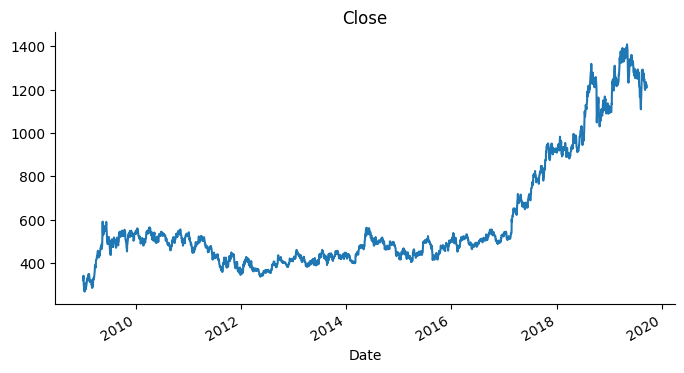

In [48]:


from matplotlib import pyplot as plt
df['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

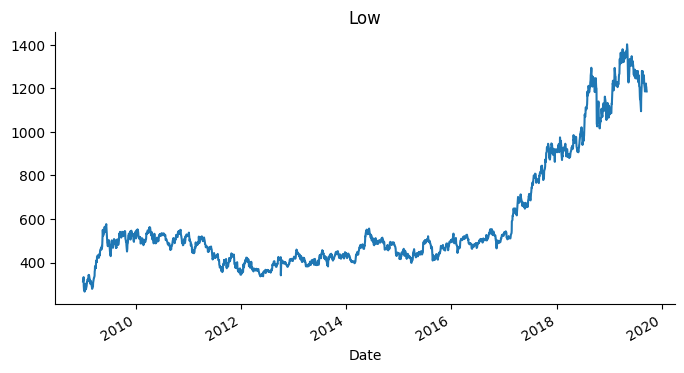

In [49]:
# @title Low

from matplotlib import pyplot as plt
df['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

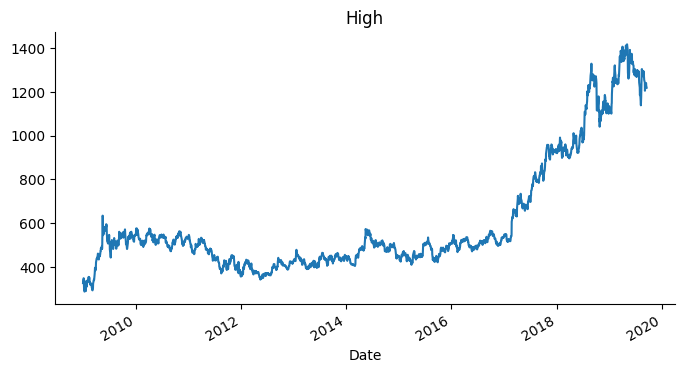

In [50]:


from matplotlib import pyplot as plt
df['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

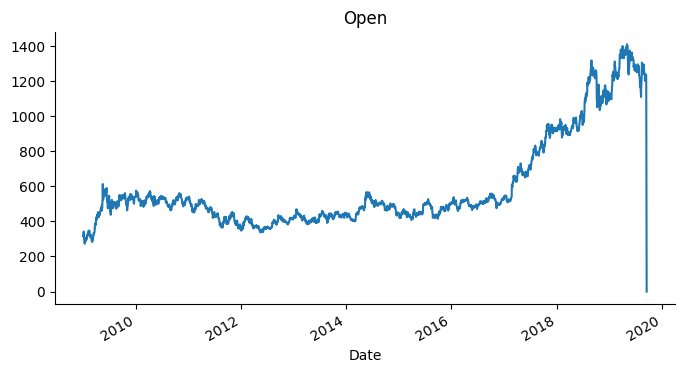

In [51]:


from matplotlib import pyplot as plt
df['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

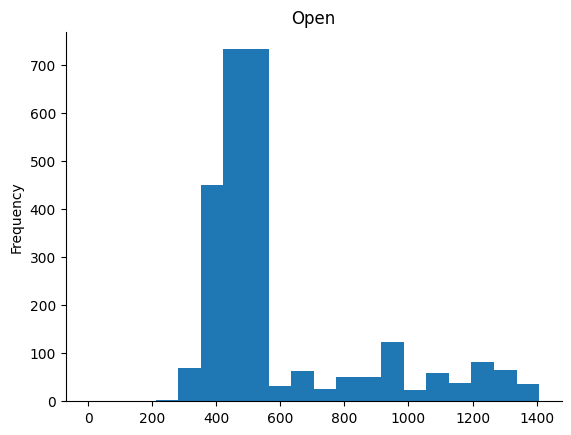

In [52]:


from matplotlib import pyplot as plt
df['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)